## Time Filter

In [8]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [84]:
%time df = pd.read_pickle("data/to_pickle.pk1.xz")
df

Wall time: 1.05 s


,x,y,obj,size,seq,filename,time
0,14,329,0,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
1,4,291,1,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
2,629,7,2,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
3,253,4,3,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
4,185,4,4,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
5,5,102,5,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
6,6,102,5,362,1,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
7,6,102,5,362,2,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
8,7,102,5,362,3,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
9,9,102,5,362,4,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17


In [104]:
start_date = pd.to_datetime("2017-08-17 01:27:09")
end_date = pd.to_datetime("2017-08-24 15:32:21")

## range of hours

In [105]:
objs = df[(df.time.dt.time > start_date.time()) & (df.time.dt.time <= end_date.time())]
objs = objs.groupby(["filename", "obj"]).size().sort_values(ascending=False)
len(objs)

15486

## range of hours  - date

In [108]:
objs_date = df[(df.time.dt.time > start_date.time()) & (df.time.dt.time <= end_date.time()) & (df.time.dt.date <= end_date.date())]
objs_date = objs.groupby(["filename", "obj"]).size().sort_values(ascending=False)
top_ten_date = objs_date.head(10)

In [97]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index()
top_ten = objs.head(20)

In [98]:
im = imread('data/paths0.png')

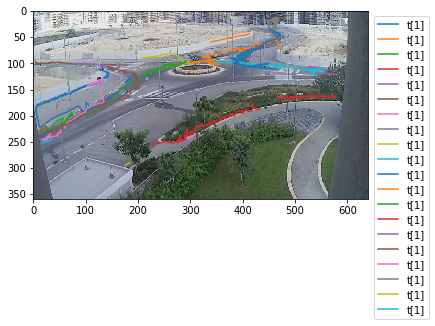

In [107]:
imshow(im)
for t in top_ten.index:
    s_o = df_by_obj.loc[t]
    plot(s_o.x, s_o.y, label = t[1])
legend(loc=9, bbox_to_anchor = (1.1, 1))

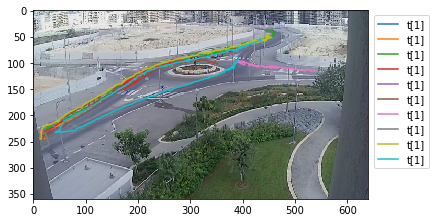

In [109]:
imshow(im)
for t in top_ten_date.index:
    s_o = df_by_obj.loc[t]
    plot(s_o.x, s_o.y, label = t[1])
legend(loc=9, bbox_to_anchor=(1.1, 1))